In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Download and unpack data

In [88]:
data_path = 'data/mnist/'

In [89]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

In [90]:
import os
os.makedirs(data_path, exist_ok=True)

In [91]:
import requests
import shutil

def download_file(url_to_file, data_path):
    local_filename = url_to_file.split('/')[-1]
    if os.path.isfile(data_path + local_filename):
        pass
    else:
        r = requests.get(url_to_file, stream=True)
        with open(os.path.join(data_path + local_filename), 'wb') as f:
            shutil.copyfileobj(r.raw, f)
    return local_filename

In [92]:
local_filename = download_file(URL+FILENAME, data_path)

In [93]:
import pickle
import gzip

def depickle(file_path):
    return pickle.load(gzip.open(file_path, 'rb'), encoding='latin-1')

Normalize

In [94]:
((x, y), (x_valid, y_valid), _) = depickle(data_path+local_filename)

In [95]:
mean = x.mean()
std = x.std()

In [96]:
x = (x-mean)/std
mean, x.mean(), std, x.std()

(0.13044983, -3.1638146e-07, 0.3072898, 0.99999934)

In [97]:
x_valid = (x_valid-mean)/std
x_valid.mean(), x_valid.std()

(-0.005850922, 0.99243325)

Data is ready. Check it out

In [164]:
def showim(img, label, index):
    x = np.reshape(img[index,:],(-1, 28,28))
    plt.title('label = '+str(label[index]), fontsize=19)
    plt.imshow(x[0,:,:])

In [99]:
x.shape
x[0,0]

-0.42451727

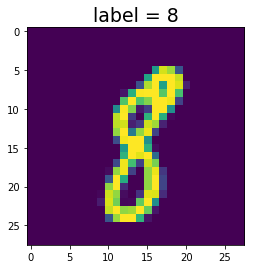

In [100]:
showim(x,y,300)

# Implementation

## SGD

In [33]:
import pickle
import gzip

def depickle(file_path):
    return pickle.load(gzip.open(file_path, 'rb'), encoding='latin-1')

In [34]:
data_path = 'data/mnist/'
local_filename='mnist.pkl.gz'

Normalize

In [35]:
((x, y), (x_valid, y_valid), _) = depickle(data_path+local_filename)

In [36]:
mean = x.mean()
std = x.std()

In [37]:
x = (x-mean)/std
mean, x.mean(), std, x.std()

(0.13044983, -3.1638146e-07, 0.3072898, 0.99999934)

In [38]:
x_valid = (x_valid-mean)/std
x_valid.mean(), x_valid.std()

(-0.005850922, 0.99243325)

In [39]:
import numpy as np
import math

In [40]:
def relu(x):
    x[x < 0] = 0
    return x
    
def relu_d(x):
     x[x<=0] = 0
     x[x>0] = 1
     return x
    
def softmax(x):
    '''stable way of computing softmax'''
    shiftx = x - np.expand_dims(np.max(x, axis=1),1)
    exps = np.exp(shiftx)
    return exps / np.expand_dims(np.sum(exps, axis=1), 1)    

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_d(x):
    return x * (1-x)

def onehot(y):
    size = len(y)
    one = np.zeros((size, 10))
    one[np.arange(size),y] = 1
    return one

def onehot_d(x):
    return np.argmax(x)
    
def generator(bs, examples, labels):
    n_batches = int(np.floor(len(examples)/bs))
    it = 0
    while it <= n_batches*bs-1:
        yield examples[it:it+bs,:], labels[it:it+bs], n_batches
        it += bs
    it = 0

In [41]:
bs = 32
imdim = 28
input_layer = imdim**2
hidden_layer = 100
output_layer = np.max(y)+1

In [42]:
W1 = np.random.rand(input_layer, hidden_layer)*2-1
W2 = np.random.rand(hidden_layer, output_layer)*2-1

In [44]:
epochs = 5
eta = 0.1

for i in range(epochs):
    trues = 0
    for a1, labs, n_batches in generator(bs, x, y):
        # forward pass
        z2 = np.dot(a1, W1)
        a2 = relu(z2)
        z3 = np.dot(a2, W2)
        a3 = softmax(z3)
        
        # backward pass
        onh = onehot(labs)
        d3 = a3 - onh
        d2 = np.dot(d3, W2.T) * relu_d(a2)
        
        # update weights
        W2 -= eta * np.dot(a2.T,d3) / bs
        W1 -= eta * np.dot(a1.T,d2) / bs
        
        trues += np.sum(a3.argmax(axis=1)==labs)
    print('aantal keer per batch:                           ', test)
    
    if i%(1) == 0:
        print('epoch             = ', i)
        print('acc   = ', trues/(n_batches*bs)*100, '%')
        trues = 0
        for a1_v, labs_v, n_batches in generator(bs, x_valid, y_valid):
            z2_v = np.dot(a1_v, W1)
            a2_v = relu(z2_v)
            z3_v = np.dot(a2_v, W2)
            a3_v = softmax(z3_v)
            trues += np.sum(a3_v.argmax(axis=1)==labs_v)
        print('valid   = ', trues/(n_batches*bs)*100, '%')
    test = 0
    
print('Done!')

aantal keer per batch:                            0
epoch             =  0
acc   =  94.01008322663252 %
valid   =  92.02724358974359 %
aantal keer per batch:                            0
epoch             =  1
acc   =  94.50624199743918 %
valid   =  92.24759615384616 %
aantal keer per batch:                            0
epoch             =  2
acc   =  95.00040012804098 %
valid   =  92.4579326923077 %
aantal keer per batch:                            0
epoch             =  3
acc   =  95.47055057618438 %
valid   =  92.50801282051282 %
aantal keer per batch:                            0
epoch             =  4
acc   =  95.7766485275288 %
valid   =  92.55809294871796 %
Done!


In [16]:
i=0

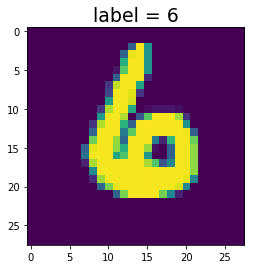

In [431]:
showim(a1, labs, i)
i+=1

## Plus batchnorm, shuffled generator

In [33]:
import pickle
import gzip

def depickle(file_path):
    return pickle.load(gzip.open(file_path, 'rb'), encoding='latin-1')

In [34]:
data_path = 'data/mnist/'
local_filename='mnist.pkl.gz'

Normalize

In [35]:
((x, y), (x_valid, y_valid), _) = depickle(data_path+local_filename)

In [36]:
mean = x.mean()
std = x.std()

In [37]:
x = (x-mean)/std
mean, x.mean(), std, x.std()

(0.13044983, -3.1638146e-07, 0.3072898, 0.99999934)

In [38]:
x_valid = (x_valid-mean)/std
x_valid.mean(), x_valid.std()

(-0.005850922, 0.99243325)

In [39]:
import numpy as np
import math

In [50]:
def relu(x):
    x[x < 0] = 0
    return x
    
def relu_d(x):
     x[x<=0] = 0
     x[x>0] = 1
     return x
    
def softmax(x):
    '''stable way of computing softmax'''
    shiftx = x - np.expand_dims(np.max(x, axis=1),1)
    exps = np.exp(shiftx)
    return exps / np.expand_dims(np.sum(exps, axis=1), 1)    

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_d(x):
    return x * (1-x)

def onehot(y):
    size = len(y)
    one = np.zeros((size, 10))
    one[np.arange(size),y] = 1
    return one

def onehot_d(x):
    return np.argmax(x)
    
def generator(bs, examples, labels):
    n_batches = int(np.floor(len(examples)/bs))
    ids = np.random.permutation(len(examples))
    it = 0
    while it <= n_batches*bs-1:
        yield examples[ids[it:it+bs],:], labels[ids[it:it+bs]], n_batches
        it += bs
    it = 0
    ids = np.random.permutation(len(examples))

In [51]:
bs = 32
imdim = 28
input_layer = imdim**2
hidden_layer = 100
output_layer = np.max(y)+1

In [52]:
W1 = np.random.rand(input_layer, hidden_layer)*2-1
W2 = np.random.rand(hidden_layer, output_layer)*2-1

In [53]:
epochs = 5
eta = 0.1

for i in range(epochs):
    trues = 0
    for a1, labs, n_batches in generator(bs, x, y):
        # forward pass
        z2 = np.dot(a1, W1)
        a2 = relu(z2)
        z3 = np.dot(a2, W2)
        a3 = softmax(z3)
        
        # backward pass
        onh = onehot(labs)
        d3 = a3 - onh
        d2 = np.dot(d3, W2.T) * relu_d(a2)
        
        # update weights
        W2 -= eta * np.dot(a2.T,d3) / bs
        W1 -= eta * np.dot(a1.T,d2) / bs
        
#         # batch normalization
#         temp = (W1.std(), W1.mean())
#         W1 = (W1 / temp[0])-temp[1]
#         temp = (W2.std(), W2.mean())
#         W2 = (W2 / temp[0])-temp[1]
        
        trues += np.sum(a3.argmax(axis=1)==labs)
    print('aantal keer per batch:                           ', test)
    
    if i%(1) == 0:
        print('epoch             = ', i)
        print('acc   = ', trues/(n_batches*bs)*100, '%')
        trues = 0
        for a1_v, labs_v, n_batches in generator(bs, x_valid, y_valid):
            z2_v = np.dot(a1_v, W1)
            a2_v = relu(z2_v)
            z3_v = np.dot(a2_v, W2)
            a3_v = softmax(z3_v)
            trues += np.sum(a3_v.argmax(axis=1)==labs_v)
        print('valid   = ', trues/(n_batches*bs)*100, '%')
    test = 0
    
print('Done!')

aantal keer per batch:                            0
epoch             =  0
acc   =  85.43333866837388 %
valid   =  88.84214743589743 %
aantal keer per batch:                            0
epoch             =  1
acc   =  90.22887323943662 %
valid   =  90.94551282051282 %
aantal keer per batch:                            0
epoch             =  2
acc   =  92.31153969270166 %
valid   =  92.39783653846155 %
aantal keer per batch:                            0
epoch             =  3
acc   =  93.72399167733676 %
valid   =  92.74839743589743 %
aantal keer per batch:                            0
epoch             =  4
acc   =  94.58826824583866 %
valid   =  93.02884615384616 %
Done!


In [16]:
i=0

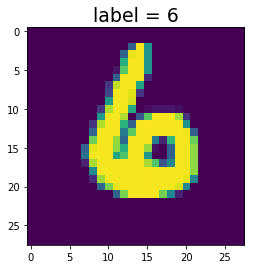

In [431]:
showim(a1, labs, i)
i+=1

## Formulas

We take as a trainings example: (x,y)  
where x is the input  
and y is the label  
  
**Forward pass:**  
a<sup>1</sup> = x<sup>1</sup>  
  
z<sup>2</sup> = $\Theta$<sup>1</sup>a<sup>1</sup>  
a<sup>2</sup> = relu(z<sup>2</sup>)  
  
z<sup>3</sup> = $\Theta$<sup>2</sup>a<sup>2</sup>  
a<sup>3</sup> = softmax(z<sup>3</sup>)  
o<sup>3</sup> = a<sup>3</sup>  
  
**Backward pass:**  
$\delta^3 = \frac{\partial err}{\partial a^3} \frac{\partial a^3}{\partial z^3} = (o^3-y) \cdot \sigma(o^3) \cdot (1 - \sigma(o^3))$  
$\frac{\partial err}{\partial \Theta^2} = a^2 \delta^3$  
$\frac{\partial err}{\partial b^2} = \delta^3$  
$\delta^2 = \delta^3_i \Theta^2_{ij} \begin{cases} 
    \delta^3_i \Theta^2_{ij}, & \text{if } \delta^3_i \Theta^2_{ij}\gt 0 \\
    0, & \text{otherwise} \end{cases}$  
$\frac{\partial err}{\partial \Theta^1} = a^1 \delta^2$  
$\frac{\partial err}{\partial b^1} = \delta^2$  
**Update weights:**  
$\Theta^2_{new} = \Theta^2 - \eta \cdot a^2 \delta^3$  
$b^2_{new} = b^2 - \eta \cdot \delta^3$  
$\Theta^1_{new} = \Theta^1 - \eta \cdot a^1 \delta^2$  
$b^1_{new} = b^1 - \eta \cdot \delta^2$

**Gradient calculation:**  
for the 2nd weight matrix  
err = $\frac{1}{2} (y-o^3)^2$  
$\frac{\partial err}{\partial \Theta^2} = \frac{\partial err}{\partial a^3} \frac{\partial a^3}{\partial z^3} \frac{\partial z^3}{\partial \Theta^2}$  
$\frac{\partial err}{\partial a^3} = o^3-y$  
$\frac{\partial a^3}{\partial z^3} = \sigma(o^3) \cdot (1 - \sigma(o^3))$  
$\frac{\partial z^3}{\partial \Theta^2} = a^2 $  
  
Node $\delta^3$:  
$\delta^3 = \frac{\partial err}{\partial a^3} \frac{\partial a^3}{\partial z^3} = (o^3-y) \cdot \sigma(o^3) \cdot (1 - \sigma(o^3))$  
$\frac{\partial err}{\partial \Theta^2} = a^2 \delta^3$

for the 1st weight matrix  
err = $\frac{1}{2} (y-o^3)^2$  
$\frac{\partial err}{\partial \Theta^1} = \frac{\partial err}{\partial a^3} \frac{\partial a^3}{\partial z^3} \frac{\partial z^3}{\partial a^2} \frac{\partial a^2}{\partial z^2} \frac{\partial z^2}{\partial \Theta^1}$  
$\frac{\partial z^3}{\partial a^2} = \Theta^2$  
$\frac{\partial a^2}{\partial z^2} = $ relu_d $ = \begin{cases} 1, & \text{if } x\gt 0 \\
                                                                0, & \text{otherwise} \end{cases}$  
$\frac{\partial z^2}{\partial \Theta^1} = a^1$  
  
Node $\delta^2$:  
$\delta^2 = \frac{\partial err}{\partial a^3} \frac{\partial a^3}{\partial z^3} \frac{\partial z^3}{\partial a^2} \frac{\partial a^2}{\partial z^2} = \delta^3 \frac{\partial z^3}{\partial a^2} \frac{\partial a^2}{\partial z^2} = \delta^3_i \Theta^2_{ij} \begin{cases} 
    \delta^3_i \Theta^2_{ij}, & \text{if } \delta^3_i \Theta^2_{ij}\gt 0 \\
    0, & \text{otherwise} \end{cases}$  
$\frac{\partial err}{\partial \Theta^1} = a^1 \delta^2$

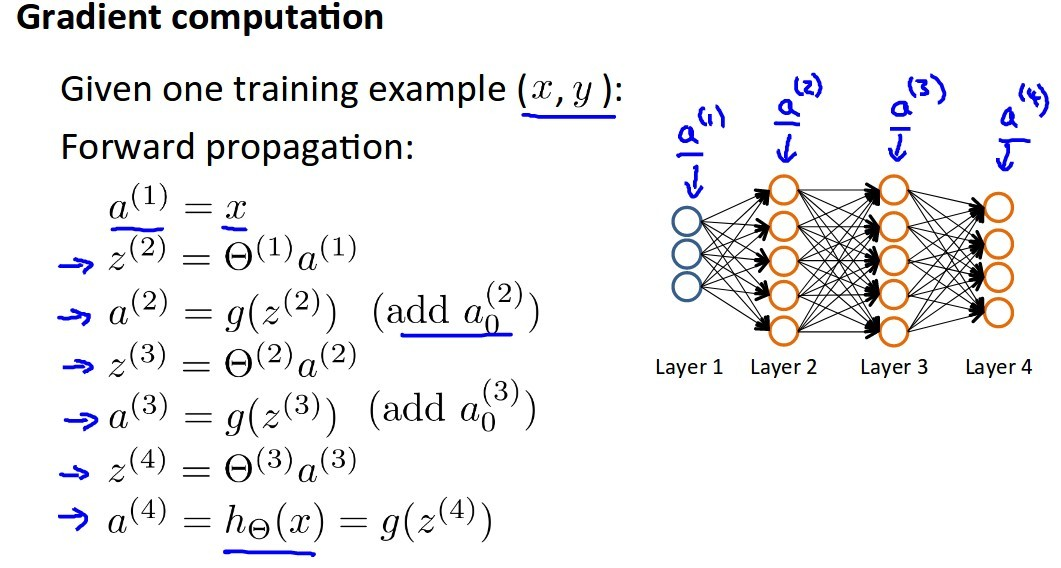

In [762]:
from IPython.display import Image
Image("layers.jpg")

## Links

https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/  
https://stackoverflow.com/questions/40575841/numpy-calculate-the-derivative-of-the-softmax-function  
https://ayearofai.com/rohan-lenny-1-neural-networks-the-backpropagation-algorithm-explained-abf4609d4f9d  
http://florianmuellerklein.github.io/nn/  
https://iamtrask.github.io/2015/07/12/basic-python-network/  
https://www.coursera.org/learn/machine-learning/lecture/1z9WW/backpropagation-algorithm  
en in deze folder zit machine learning ng week5 backprop algo  
TD: errors omrekenen naar D en daar Delta's van maken en weights updaten.  
http://kawahara.ca/what-is-the-derivative-of-relu/  
https://deepnotes.io/softmax-crossentropy  
